In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [2]:
CBxs = pd.read_csv('C:/Users/Emily/Desktop/CB4856_screen/CBMM.csv', index_col=0)
comps = CBxs.columns.tolist()
comps.remove('Empty:Empty')
print(str(len(comps)))

43


In [3]:
N2xs = pd.read_csv('C:/Users/Emily/Documents/S1/S1_xs3.csv', usecols=comps)
N2xs

,HuperzineA,1-octanol,"2,3-Dihydrobenzofuran","2,5-Dihydroxybenzoic acid",2-Methyl-1-butanol,2-nonanone,Acetophenone,Anisole,Camphor,Carnosol,...,L-Mimosine,Sabinene,Salvinorin A Propionate,Sinomenine hydrochloride,Solasodine,Spinosad,Thiophene,Ursolic acid,p-Tolualdehyde,α-Phellandrene
0,-10.592637,22.512030,-7.925637,-4.665970,18.469196,5.959696,-0.220970,-19.694304,-24.520304,-25.366970,...,-25.155304,-7.777470,-3.649970,23.655030,-22.551804,-22.043804,-13.365470,-22.890470,-7.502304,-7.502304
1,10.658696,11.441863,3.081030,-21.832137,11.568863,3.737196,9.219363,-14.063970,-19.397970,3.356196,...,-8.899304,16.543030,-5.935970,21.601863,-19.270970,-21.429970,-9.195637,-15.545637,-1.681470,-0.326804
2,2.403696,8.923030,-9.026304,-7.311804,17.495530,14.553363,13.283363,-18.445470,-21.747470,1.324196,...,-10.021137,15.442363,-16.307637,24.205363,-12.285970,-19.842470,-15.037637,-12.010804,-3.036137,5.409363
3,5.240030,5.917363,10.531696,0.054196,1.451196,20.247196,16.691196,-7.100137,-6.549804,-13.386637,...,-6.126470,23.422196,-21.070137,14.003030,-2.655137,-8.031470,6.954530,-19.038137,0.138863,10.891530
4,-2.125970,10.044863,8.563196,2.530696,13.029363,-1.067637,-7.184804,-21.218304,-14.275637,-14.910637,...,-17.831637,20.691696,9.155863,11.590030,-15.312804,-7.227137,12.542530,-21.959137,6.298363,5.155363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


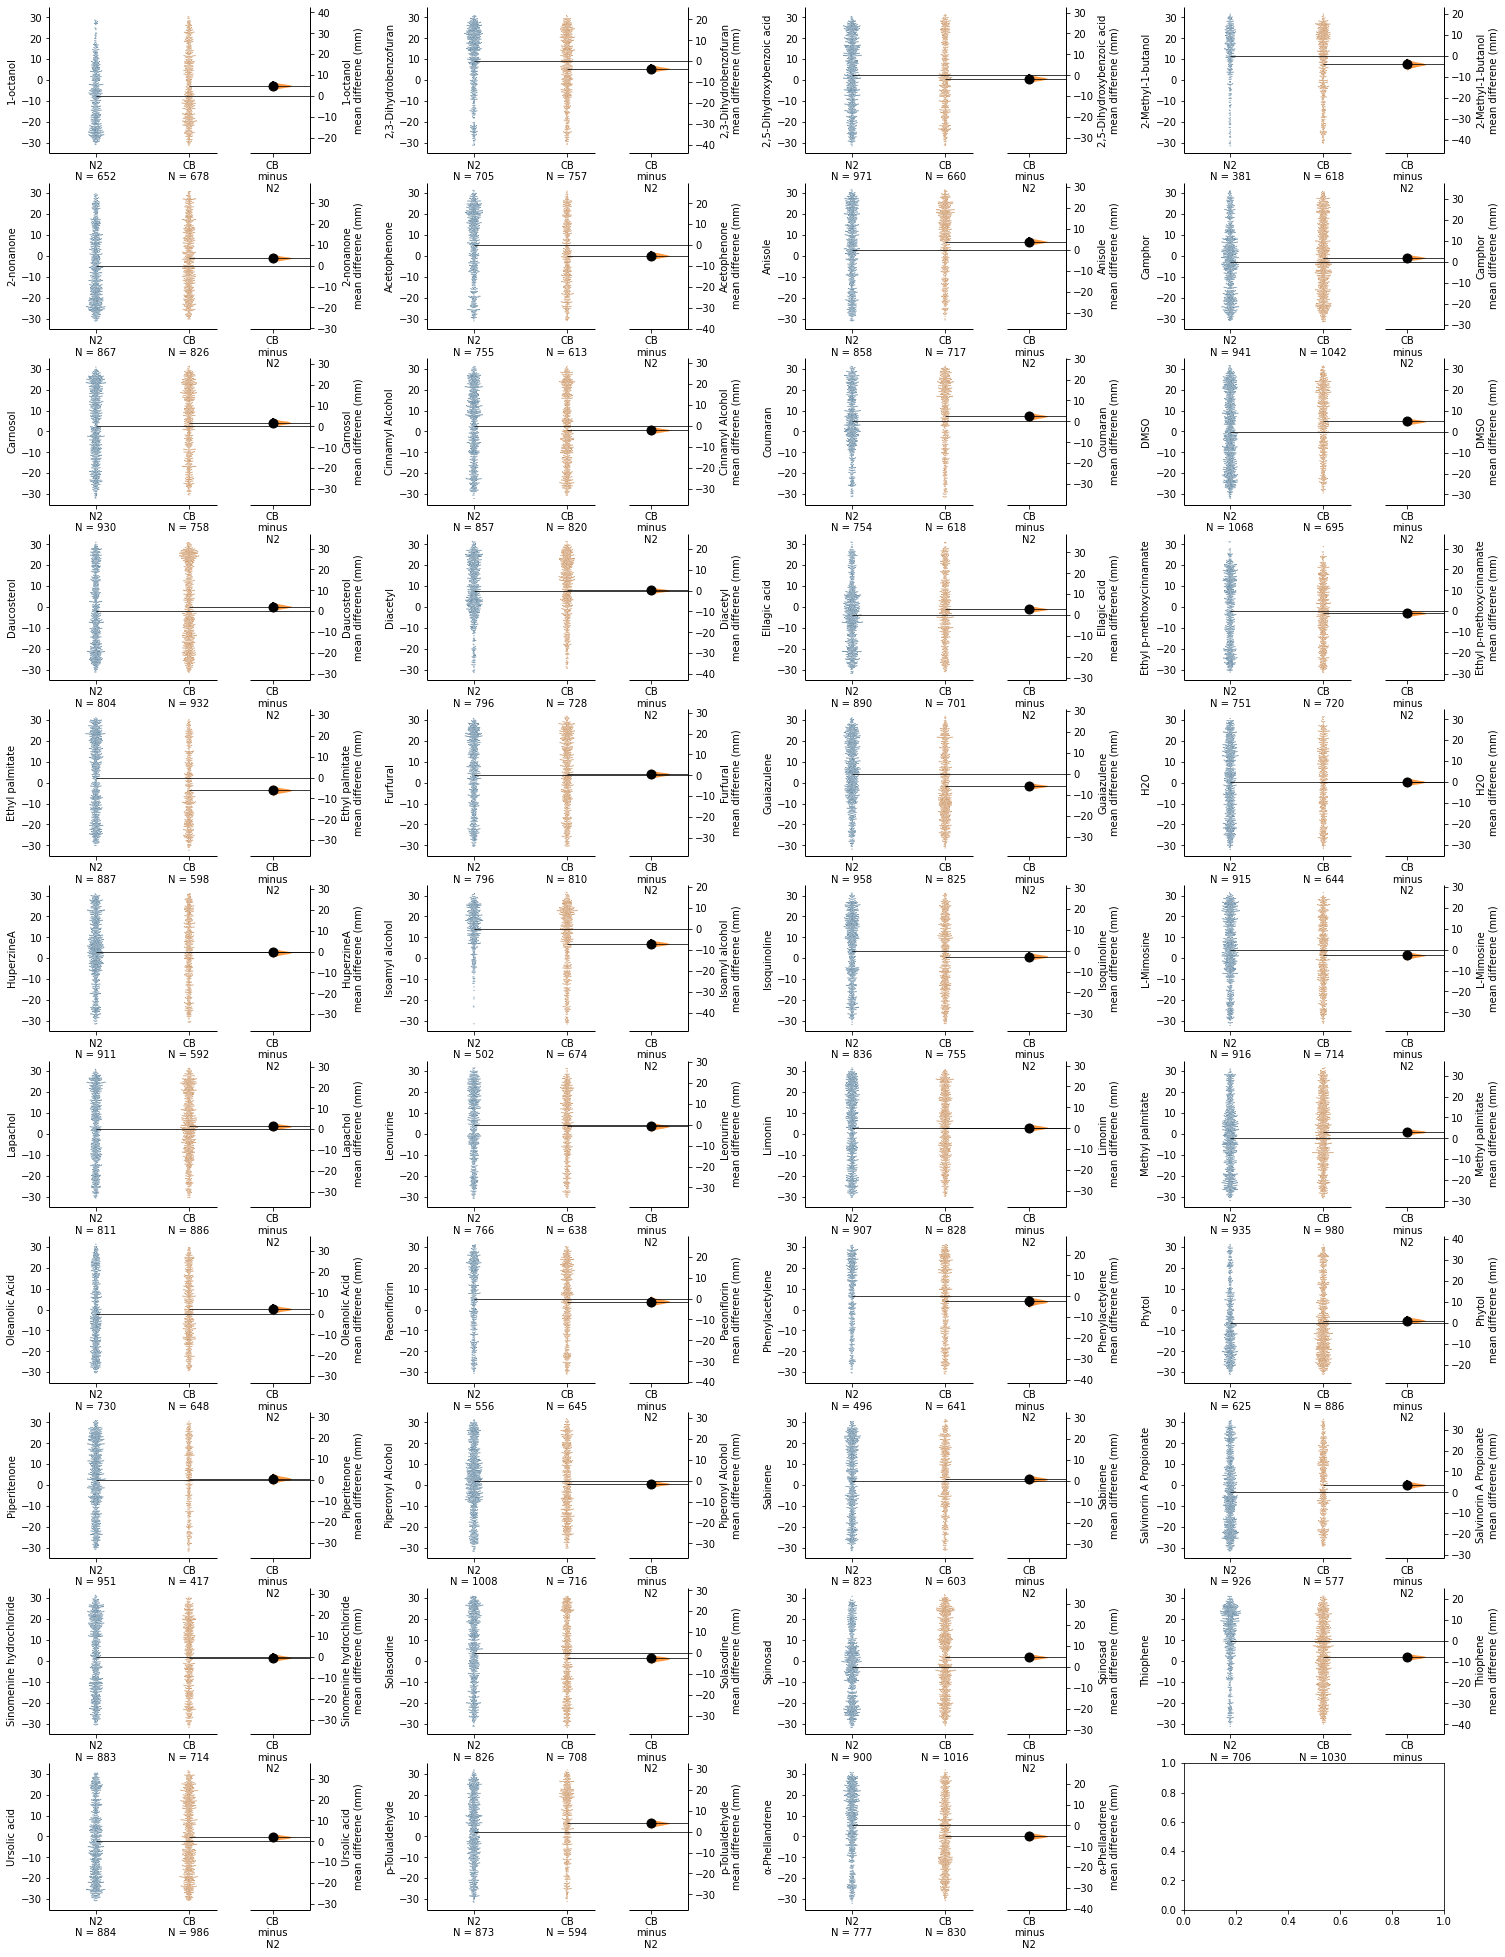

In [4]:
f, axx = plt.subplots(nrows=11, ncols=4,
                    figsize=(25, 35),
                    gridspec_kw={'wspace': 0.45})

i=0


all_res = pd.DataFrame()
for c in comps:
    N2 = N2xs[c]
    CB = CBxs[c]
    df = pd.DataFrame({'N2':N2, 'CB':CB})
    db_obj = db.load(df, idx=(['N2', 'CB']))
    mm_plot = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = c, 
        contrast_label= c + "\nmean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35), ax=axx.flat[i])
    res = db_obj.mean_diff.results
    res['Compound'] = c
    all_res = all_res.append(res)
    i += 1
plt.savefig('C:/Users/Emily/Desktop/CB4856_screen/CBxN2plots.png')

In [6]:
sort_res = all_res.sort_values(by='difference').reset_index()
#all_res.to_csv('C:/Users/Emily/Desktop/CB4856_screen/n2vcb_mdiff.csv')

In [7]:
sort_res.head()

,index,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,...,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney,Compound
0,0,N2,CB,706,1030,mean difference,False,-7.737187,95,-9.231782,...,12345,0.0,5000,1.606340e-23,10.160527,2.237866e-23,10.107621,5.525443e-25,469504.0,Thiophene
1,0,N2,CB,502,674,mean difference,False,-7.019907,95,-8.460186,...,12345,0.0,5000,1.182860e-18,8.969420,9.513964e-17,8.436283,1.194403e-10,206274.0,Isoamyl alcohol
2,0,N2,CB,887,598,mean difference,False,-6.103623,95,-7.931415,...,12345,0.0,5000,2.955789e-11,6.705392,5.026997e-11,6.619365,1.275028e-10,317327.0,Ethyl palmitate
3,0,N2,CB,958,825,mean difference,False,-5.740556,95,-7.197811,...,12345,0.0,5000,2.078197e-14,7.712369,1.686893e-14,7.737429,7.253591e-15,479508.0,Guaiazulene
4,0,N2,CB,777,830,mean difference,False,-5.081201,95,-6.697687,...,12345,0.0,5000,7.439604e-10,6.194216,7.251142e-10,6.198082,2.077523e-10,381537.0,α-Phellandrene


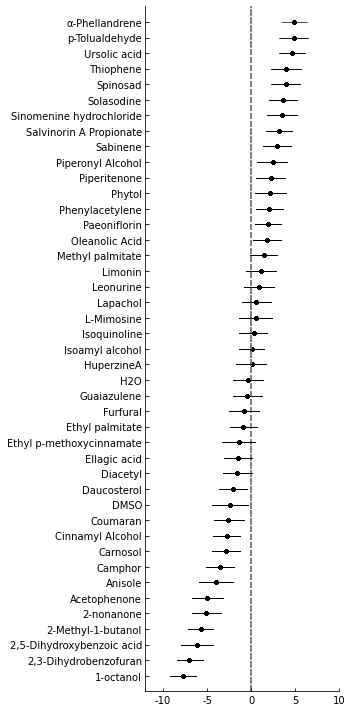

In [18]:
fig, ax = plt.subplots(figsize=(5,10)) 

positions = list(range(0, len(comps)))

lines = []

for index, row in sort_res.iterrows():
    line = ((row['bca_low'], index), (row['bca_high'], index))
    lines.append(line)


    ytick_labels = comps

    mdiffs = list(sort_res['difference'])

    hln_coll = mpl.collections.LineCollection(lines, colors='black', linewidths = .7)

    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    ax.axvline(0, ls='--', c='gray', zorder=1)
    #ax.fill_betweenx(positions, sub['bca_low'], sub['bca_high'], alpha=.25, joinstyle='round')
    ax.add_collection(hln_coll)
    ax.scatter(mdiffs, positions, s=8, c='black')
    ax.tick_params(axis='both', tickdir='in')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(-12,10)    
    ax.set_ylim(-1, len(comps))


    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('C:/Users/Emily/Desktop/CB4856_screen/CB4856_cis.png', dpi=300)